/Users/kyypgh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


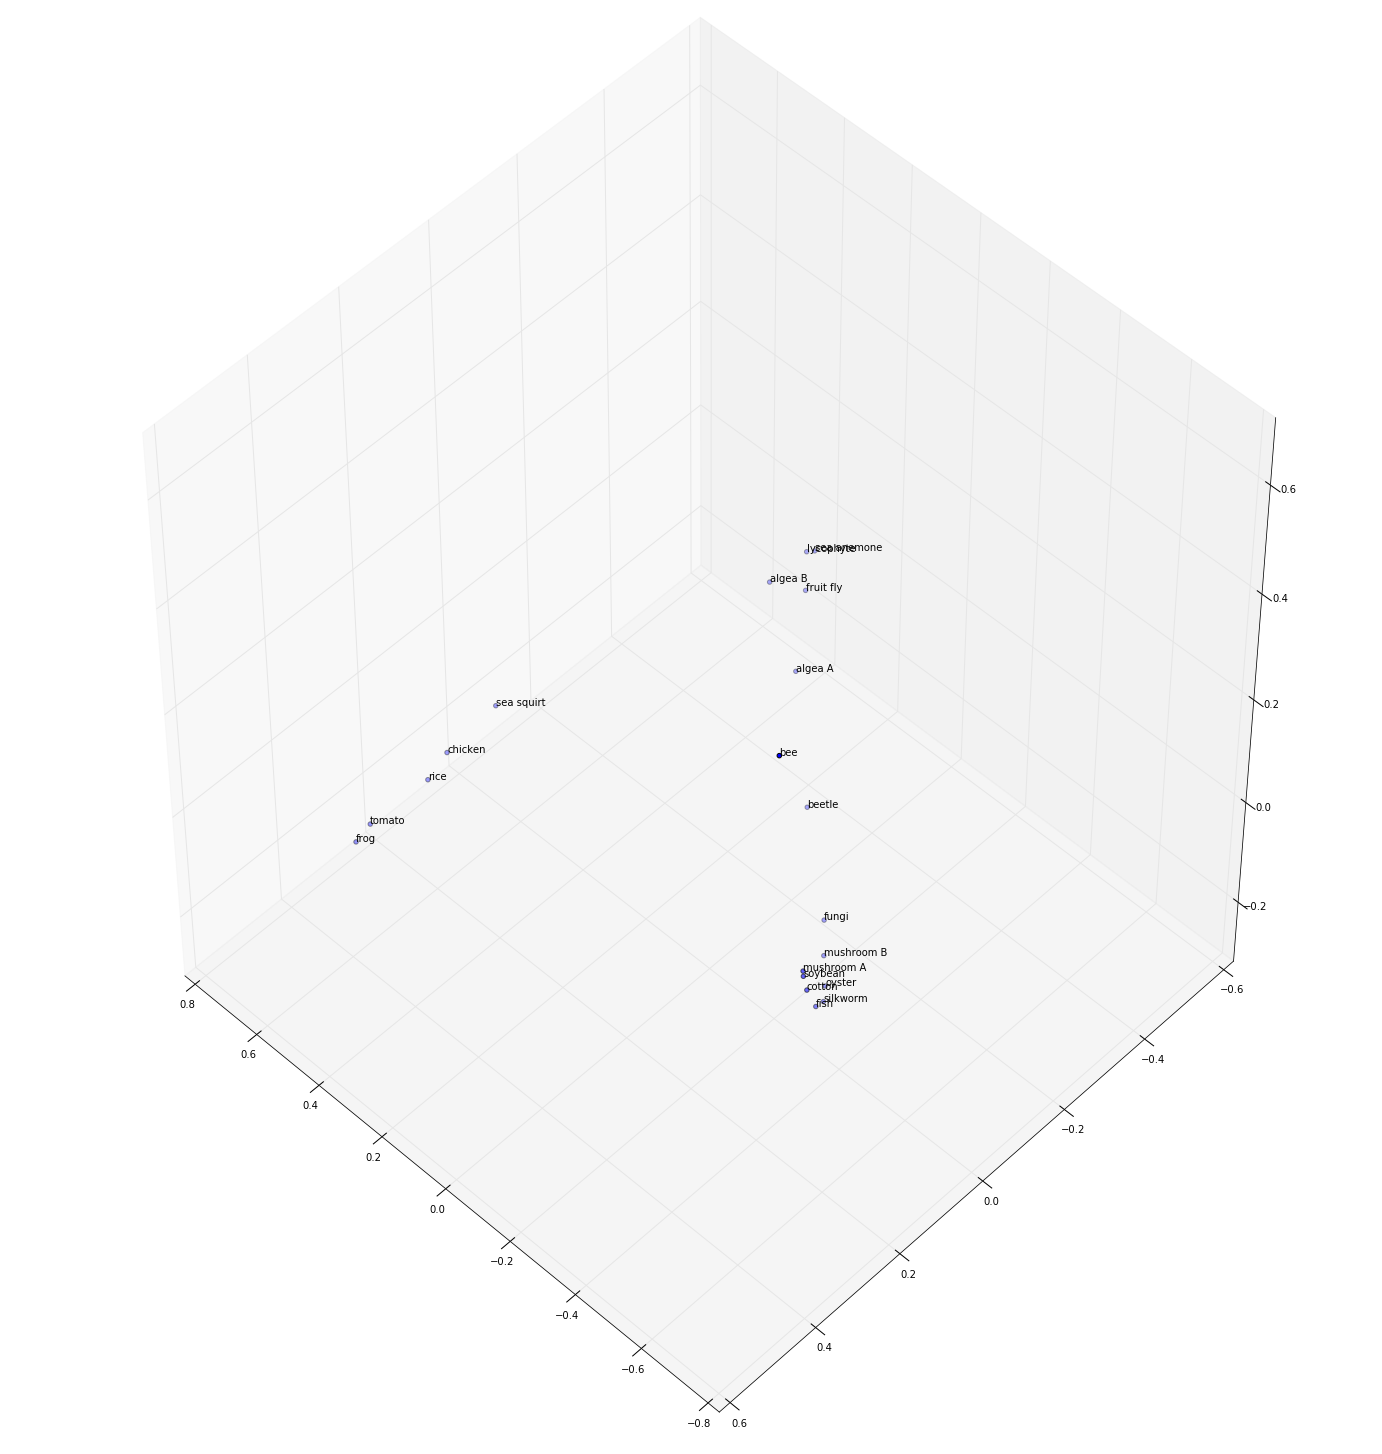

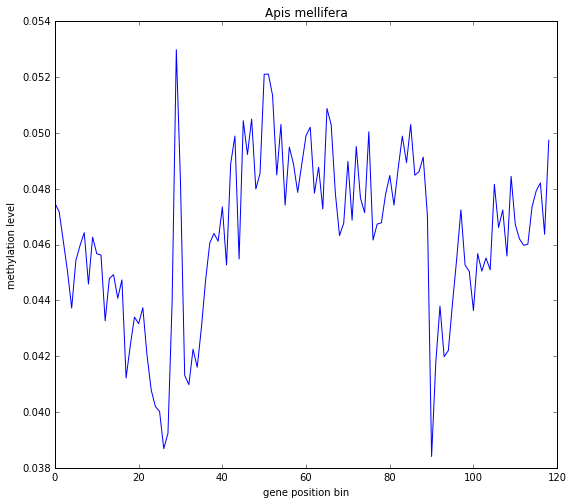

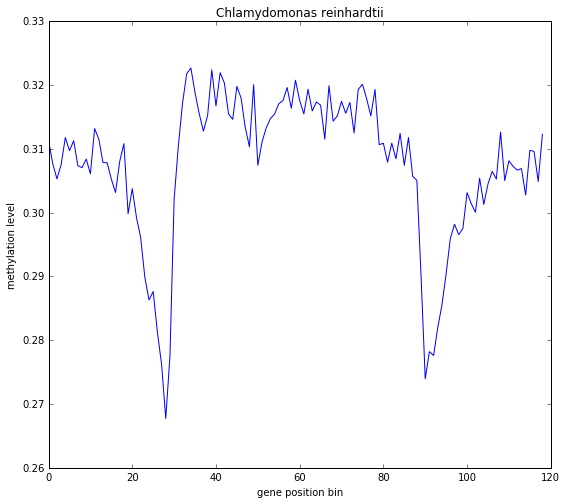

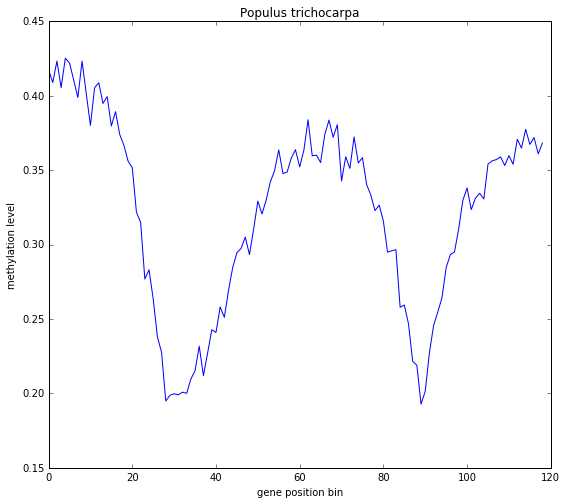

In [144]:
%matplotlib inline
import numpy as np
import sys
import scipy.stats
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


global All_Species
All_Species = {}
All_SpeciesN = {}
speciess = []
files = ['Apis_mellifera.met', 'Coprinus_cinereus.met', 'Glycine_max.met', 'Populus_trichocarpa.met', 'Tetraodon_nigroviridis.met',
'Bombyx_mori.met', 'Crassostrea_gigas.met', 'Laccaria_bicolor.met', 'Postia_placenta.met', 'Tribolium_castaneum.met',
'Chlamydomonas_reinhardtii.met', 'Drosophila_melanogaster.met','Nematostella_vectensis.met', 'Selaginella_moellendorffii.met',
'Volvox_carteri.met','Ciona_intestinalis.met','Gallus_gallus.met','Oryza_sativa.met','Solanum_lycopersicum.met',
         'Xenopus_tropicalis.met']
speciessB = ['bee', 'mushroom A', 'soybean', 'cotton', 'fish', 'silkworm', 'oyster', 'mushroom B', 'fungi', 'beetle',
        'algea A','fruit fly', 'sea anemone', 'lycophyte', 'algea B', 'sea squirt', 'chicken', 'rice', 'tomato', 'frog']
X = 'a'

labels = np.array([0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0 ]) #animal= 0 plant = 1 fungi = 2


for i in range(len(files)):
        speciess.append(' '.join(files[i].split('.')[0].split('_')))
        with open(files[i]) as fh:
                line = fh.readline()
                species = files[i].split('.')[0]
                All_Species[species] = []
                while len(line) != 0:
                        All_Species[species].append(float(line.strip()))
                        line = fh.readline()
        All_Species[species] = np.array(All_Species[species])
        if X == 'a':
            X = All_Species[species]
            continue
        X = np.concatenate((X, All_Species[species] ), axis=0)
        
X = X.reshape((119, 20)).T    
fig = plt.figure(1, figsize=(20, 20))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],  cmap=plt.cm.spectral)
for i in range(len(speciessB)):
    ax.text( X[i, 0], X[i,1], X[i,2], speciessB[i])
plt.show()
        
        

plt.figure(figsize=(9,8))
plt.title('Apis mellifera')
plt.plot(All_Species['Apis_mellifera'])
plt.xlabel('gene position bin')
plt.ylabel('methylation level')
plt.show()

plt.figure(figsize=(9,8))
plt.title('Chlamydomonas reinhardtii')
plt.plot(All_Species['Chlamydomonas_reinhardtii'])
plt.ylabel('methylation level')
plt.xlabel('gene position bin')
plt.show()

plt.figure(figsize=(9,8))
plt.title('Populus trichocarpa')
plt.plot(All_Species['Populus_trichocarpa'])
plt.xlabel('gene position bin')
plt.ylabel('methylation level')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

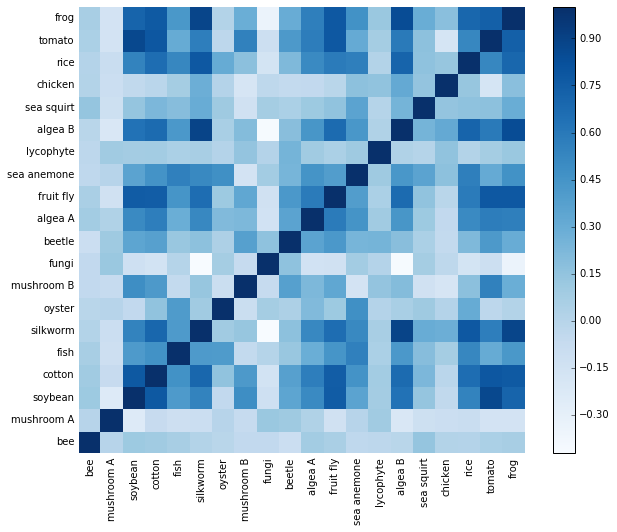

In [111]:
scores = np.zeros((len(All_Species), len(All_Species)))
i = 0
j = 0

for species1 in All_Species:
        for species2 in All_Species:

                tmp_score = scipy.stats.spearmanr(All_Species[species1][0:20], All_Species[species2][0:20])[0] *.2
                tmp_score += scipy.stats.spearmanr(All_Species[species1][20:100], All_Species[species2][20:100])[0] *.6
                tmp_score += scipy.stats.spearmanr(All_Species[species1][100:120], All_Species[species2][100:120])[0] * .2
                scores[i, j ] = tmp_score
                j += 1
        i +=1
        j = 0
    
fig, ax = plt.subplots(figsize=(10,8))
ax.set_yticks(np.arange(scores.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(scores.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(speciessB, minor=False)
ax.set_yticklabels(speciessB, minor=False)
ax.set_frame_on(False)
plt.colorbar(heatmap)
heatmap = ax.pcolor(scores, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
ax.grid(False)
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
plt.show()

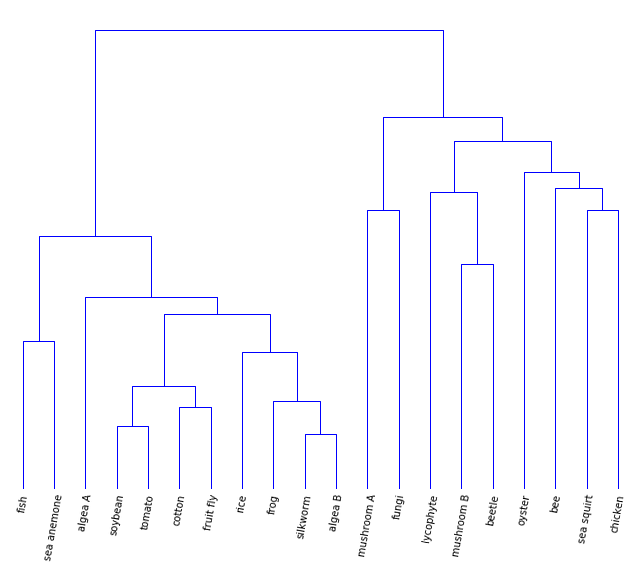

In [112]:
Z = linkage(scores, 'weighted' )
fig =plt.figure(figsize=(9,8), dpi=1000)
ax = plt.subplot(111)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
try:
    dn = dendrogram(Z ,color_threshold=0, labels= speciessB, leaf_rotation=80, leaf_font_size=10)
except AttributeError:
    pass

plt.tight_layout()
plt.show()

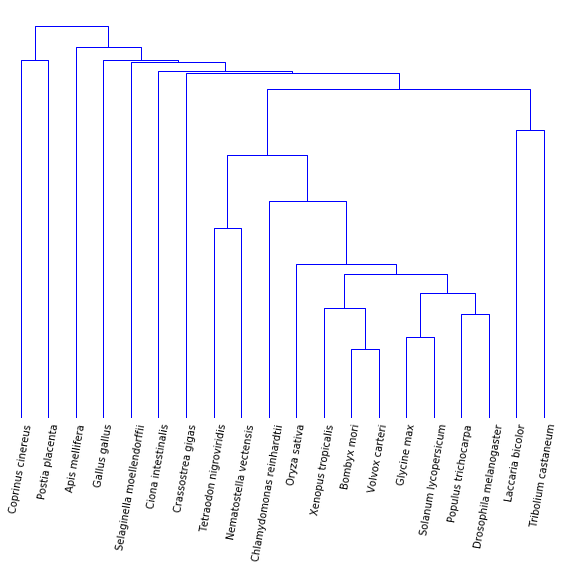

In [100]:
Z = linkage(scores, 'single' )
fig =plt.figure(figsize=(8,8), dpi=1000)
ax = plt.subplot(111)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

try:
    dn = dendrogram(Z ,color_threshold=0, labels= speciess, leaf_rotation=80, leaf_font_size=10)
except AttributeError:
    pass

plt.tight_layout()
plt.show()